# Auspice Filtering and Space Complexity Plotting Code
<br>
This notebook was used to: <br>
<br>
1.) <br>
Parse sample metadata from NCBI Datasets metadata JSONs into CSVs usable  <br>
by the Auspice Tree viewer. Features which I wanted to filter on were <br>
strains and strain groups.<br>
<br>
2.)<br>
Plot size vs sample data collected from the creation of VCF matrix files<br>
and Protobuf tree files. These plots will show how greatly the sizes and <br>
space complexities of these two data types differ, although they are used<br>
for such similar purposes.<br>


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [265]:
'''
JSON to CSV Parser for Auspice Viewer Filters

Files of interest:
- assembly_data_report(NCBIDS).jsonl
- dataset_catalog(NCBIDS).json
    - This file contains sample file names, file types, file paths, and accession nums
Features of interest:
- strain/strain group
- Sample and Assembly name
'''

dataset_catalog = open("dataset_catalog(NCBIDS).json")
dataset_catalog_dict = json.load(dataset_catalog)

In [270]:
'''Filter by whole Strain name'''
strainDict = dict()
for line in lineList:
    line_json = json.loads(line)
    strainDict[line_json['strain']] = []
#     print(line_json['assemblyInfo']['assemblyAccession']+'_'+line_json['assemblyInfo']['assemblyName']+'_genomic.fna' , " : ", line_json['strain'])
for line in lineList:
    line_json = json.loads(line)
    strainDict[line_json['strain']].append(line_json['assemblyInfo']['assemblyAccession']+'_'+line_json['assemblyInfo']['assemblyName']+'_genomic.fna')
#     print(line_json['assemblyInfo']['assemblyAccession']+'_'+line_json['assemblyInfo']['assemblyName']+'_genomic.fna' , " : ", line_json['strain'])
    
'''
Filter by strain submitters/groups
'''
strainGrpDict = dict()
for line in lineList:
    line_json = json.loads(line)
    strain = line_json['strain']
    strain_grp = "".join([i for i in strain if not i.isdigit()])
    strainGrpDict[strain_grp] = []
#     print(line_json['assemblyInfo']['assemblyAccession']+'_'+line_json['assemblyInfo']['assemblyName']+'_genomic.fna' , " : ", line_json['strain'], " : ", strain_grp)
for line in lineList:
    line_json = json.loads(line)
    strain = line_json['strain']
    strain_grp = "".join([i for i in strain if not i.isdigit()])
    strainGrpDict[strain_grp].append(line_json['assemblyInfo']['assemblyAccession']+'_'+line_json['assemblyInfo']['assemblyName']+'_genomic.fna')
#     print(line_json['assemblyInfo']['assemblyAccession']+'_'+line_json['assemblyInfo']['assemblyName']+'_genomic.fna' , " : ", line_json['strain'], " : ", strain_grp)

'''Print number of strain groups'''
print(len(strainGrpDict.keys()))

'''Print number of strains'''
print(len(strainDict.keys()))

''' Sort Strain group dict keys by val len '''
strain_grp_keys = strainGrpDict.keys()
strain_keys = strainDict.keys()
strain_grp_sorted_keys = sorted(strainGrpDict.keys(), key=lambda x:len(strainGrpDict[x]))[::-1]


232
996


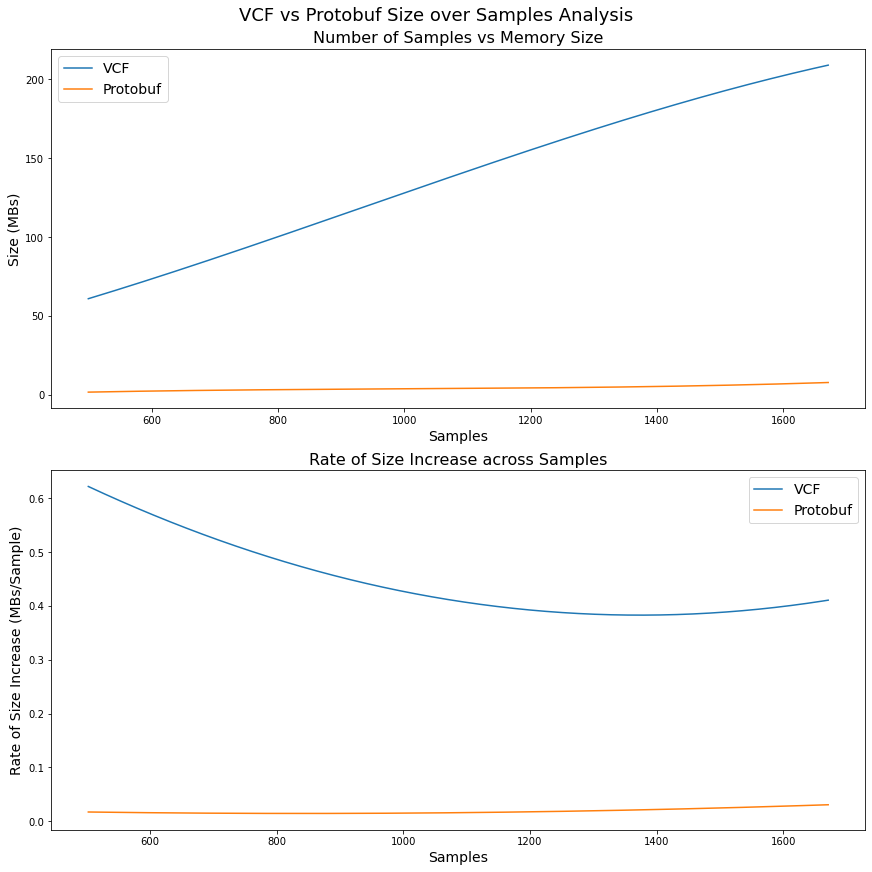

In [271]:
'''
Code for plotting Space Complexity and Size data for VCFs vs Protobufs
Found useful article for spline https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/
'''

fig, axs = plt.subplots(2, constrained_layout=True)
fig.set_figheight(12)
fig.set_figwidth(12)
fig.suptitle('VCF vs Protobuf Size over Samples Analysis', fontsize=18)

'''
Code for plotting Size differences
Found useful article for spline https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/
'''
VCF_arr =  np.array(VCF_sizes_seq)
PB_arr = np.array(PB_sizes_seq)
slpine_VCF = make_interp_spline(samples,VCF_arr)
spline_PB = make_interp_spline(samples,PB_arr)
samp = np.array(samples)
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(samp.min(), samp.max(), 500)
Y_VCF = slpine_VCF(X_)
Y_PB = spline_PB(X_)
axs[0].plot(X_, Y_VCF, label="VCF")
axs[0].plot(X_, Y_PB, label="Protobuf")
# plt.plot(samples, np.array(VCF_sizes_seq) - np.array(PB_sizes_comb), label="VCF - Protobuf Size", color="green")
axs[0].set_xlabel("Samples", fontsize=14)
axs[0].set_ylabel("Size (MBs)", fontsize=14)
axs[0].set_title("Number of Samples vs Memory Size", fontsize=16)
axs[0].legend(prop={'size': 14})

'''
Code for plotting Space Complexity Differences
spline diff
'''
VCF_arr =  np.array(VCF_sizes_comb)
PB_arr = np.array(PB_sizes_comb)
spline_VCF = make_interp_spline(samples,VCF_arr)
spline_PB = make_interp_spline(samples,PB_arr)
samp = np.array(samples)
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(samp.min(), samp.max(), 500)
Y_VCF = spline_VCF(X_)
Y_PB = spline_PB(X_)
VCFdiff = np.diff(Y_VCF)
PBdiff = np.diff(Y_PB)
# diffdiff = np.diff(Y_VCF - Y_PB)
# print(diff.size)
x = range(diff.size)
x = X_[1:]
axs[1].plot(x, VCFdiff, label="VCF")
axs[1].plot(x, PBdiff, label="Protobuf")
# plt.plot(x, diffdiff, label="Difference", color = "green")
# plt.plot(X_, Y_PB, label="Protobuf")

# plt.plot(samples, np.array(VCF_sizes_seq) - np.array(PB_sizes_comb), label="VCF - Protobuf Size", color="green")
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Rate of Size Increase (MBs/Sample)", fontsize=14)

# axs[1].set_ylim(0,1)
axs[1].set_title("Rate of Size Increase across Samples", fontsize=16)
axs[1].legend(prop={'size': 14})
# axs[1].set_yticklabels([])
# axs[1].set_xticklabels([])

# plt.savefig("Rate of Size Increase.png", dpi=300, format="png")

plt.savefig("SizeAnalysis.png", dpi=300, format="png")